In [45]:
print('hello')

hello


In [128]:
Precision1 = 20/(20+8)
Precision2 = 25/(25+18)
print(Precision1, Precision2)

0.7142857142857143 0.5813953488372093


In [129]:
Recall_1 = 20/(20+12)
Recall_2 = 25/(25+7)
print(Recall_1, Recall_2)

0.625 0.78125


In [130]:
def f_score(Precision, Recall):
    x = 2*((Precision*Recall)/(Precision+Recall))
    return x
    

In [131]:
f_score1 = f_score(Precision1, Recall_1)
f_score2 = f_score(Precision2, Recall_2)
print(f_score1, f_score2)

0.6666666666666666 0.6666666666666666


In [155]:
import matplotlib.pyplot as plt
x = 1000000
a = .1*.4*x
b = .2*.6*x
c = .4*.8*x
d = x
a1 = 2000*a - (1*a)
a2 = 2000*b - (1*b)
a3 = 2000*c - (1*c)
a4 = 2000*d - (1*d)
b1 = 2000*a - (3*a)
b2 = 2000*b - (3*b)
b3 = 2000*c - (3*c)
b4 = 2000*d - (3*d)
c1 = 2000*a - (.5*a)
c2 = 2000*b - (.5*b)
c3 = 2000*c - (.5*c)
c4 = 2000*d - (.5*d)
print(max(a1,a2,a3,a4))
print(max(b1,b2,b3,b4))
print(max(c1,c2,c3,c4))
#I don't think this is acutally right

1999000000
1997000000
1999500000.0


In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
BC_df = pd.read_csv(r"C:\Users\drobey\Documents\Coding\Machine Learning - Materials\K579ML\HW2\breast_cancer.csv")
BC_df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,9,1,2,6,4,10,7,7,2,4
1,10,4,7,2,2,8,6,1,1,4
2,6,10,10,10,8,10,7,10,7,4
3,1,1,1,1,2,5,5,1,1,2
4,7,6,10,5,3,10,9,10,2,4


In [134]:
x = BC_df.iloc[:,0:9]
y = BC_df.iloc[:,9]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=0)
x_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
312,5,1,2,10,4,5,2,1,1
202,3,1,1,1,2,1,2,1,1
263,5,1,1,1,2,1,3,1,1
395,4,6,6,5,7,6,7,7,3
101,1,1,1,1,2,1,2,1,1


In [135]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
classes = ["Benign","Malignant"]
print(y_predict)
prob_pos_clf = clf.predict_proba(x_test)[:,1]
print(prob_pos_clf)
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_pos_clf, pos_label=4)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr) #not sure if this actually makes sense to do or not? as opposed to the below function
#roc_auc_score(y_test, prob_pos_clf, pos_label=4)
print(roc_auc)

[2 2 2 2 2 4 4 2 4 2 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 4 4 4 4 2 2 4 2 2 2 2
 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 4 4 2 2 4 2 2 2 2
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 2 4 2 2 2 2 2 2 4 2 4 4 4 2 4 4 2 2 4
 2 4 4 2 2 2 4 4 2 2 2 2 4 4 2 2 4 2 2 2 4 2 2 2 2 2]
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
0.9604010025062657


Text(89.1331,0.5,'predicted label')

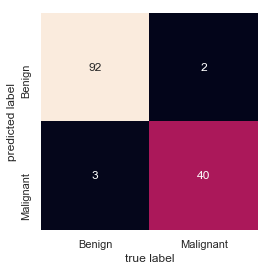

In [136]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_predict)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [137]:
Recall = 41/(41+1)
Precision = 41/(41+4)
f = f_score(Precision, Recall)
print(f, Precision, Recall)

0.9425287356321839 0.9111111111111111 0.9761904761904762


0.9635036496350365


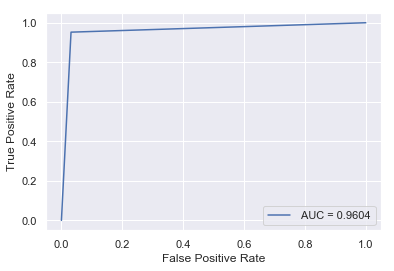

In [138]:
print(metrics.accuracy_score(y_test, y_predict))
plt.plot(fpr,tpr, label = ' AUC = %.4f'% roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()

In [89]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#create the object
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [90]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)


Text(89.1331,0.5,'predicted label')

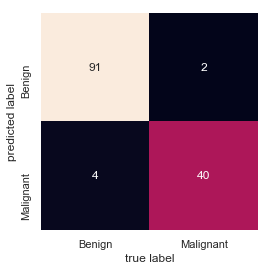

In [92]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')
#Still need to figure out how to do AUC/ROC and the associated lift

In [124]:
prob_pos_clf = clf.predict_proba(x_test)[:,1]
print(prob_pos_clf)
#These are the probabilities that the point is the second label, or #4

[4.56389952e-09 1.49601720e-10 1.63614307e-04 1.17444497e-09
 8.34917625e-09 1.00000000e+00 1.00000000e+00 7.47013909e-11
 1.00000000e+00 9.02492564e-10 1.00000000e+00 1.00000000e+00
 4.55639396e-09 5.74036688e-11 3.30846348e-10 5.74036688e-11
 1.00000000e+00 1.00000000e+00 1.94681922e-10 9.02492564e-10
 8.34400113e-11 7.47013909e-11 2.10537511e-10 1.62432308e-08
 2.72701552e-10 4.85572998e-07 1.00000000e+00 1.32462895e-02
 1.00000000e+00 1.00000000e+00 9.99999848e-01 2.27642736e-09
 1.00000000e+00 7.47013909e-11 2.11240845e-09 2.23087049e-09
 5.51862770e-10 1.00000000e+00 1.49601720e-10 1.00000000e+00
 2.10537511e-10 1.00000000e+00 1.49601720e-10 2.57553327e-07
 1.43822897e-09 1.00000000e+00 2.54639669e-01 7.34479023e-09
 1.28406232e-02 9.02492564e-10 1.46911658e-01 2.10191272e-10
 7.93924857e-10 1.94361757e-10 5.48689212e-10 4.30541861e-10
 9.99999998e-01 1.00000000e+00 3.30846348e-10 7.47013909e-11
 1.00000000e+00 9.02492564e-10 1.00000000e+00 2.47588847e-09
 8.34400113e-11 1.000000

In [125]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_pos_clf, pos_label=4)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr) #not sure if this actually makes sense to do or not? as opposed to the below function
#roc_auc_score(y_test, prob_pos_clf, pos_label=4)
print(roc_auc)

0.9867167919799498


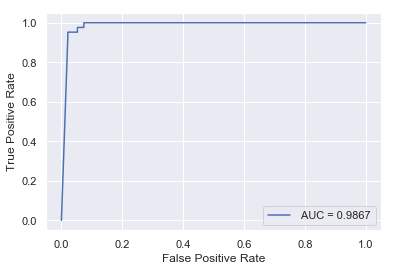

In [126]:
plt.plot(fpr,tpr, label = ' AUC = %.4f'% roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()


In [164]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#create the object
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)

Text(89.1331,0.5,'predicted label')

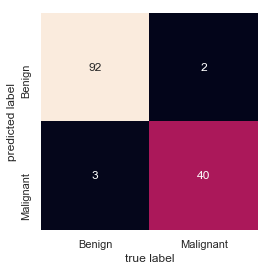

In [165]:
mat = confusion_matrix(y_test, pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')

[0.         0.         0.         0.         0.         1.
 1.         0.         1.         0.         1.         1.
 0.         0.         0.         0.         1.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         1.         1.
 0.33333333 0.         1.         0.         0.         0.
 0.         1.         0.         1.         0.         1.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.33333333 0.         0.         0.
 0.         0.         1.         1.         0.         0.
 1.         0.         1.         0.         0.         1.
 1.         0.         0.         1.         0.         0.
 0.         0.         0.66666667 0.         1.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         1.         0.         0.
 1.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         1.         

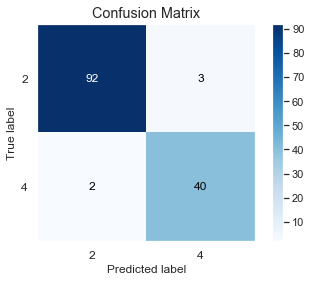

In [166]:
prob_pos_classifier = classifier.predict_proba(x_test)[:,1]
print(prob_pos_classifier)
skplt.metrics.plot_confusion_matrix(y_test, pred)
#This is a way easier way to show the confusion matrix than above

In [143]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_pos_classifier, pos_label=4)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr) #not sure if this actually makes sense to do or not? as opposed to the below function
#roc_auc_score(y_test, prob_pos_clf, pos_label=4)
print(roc_auc)

0.9878446115288221


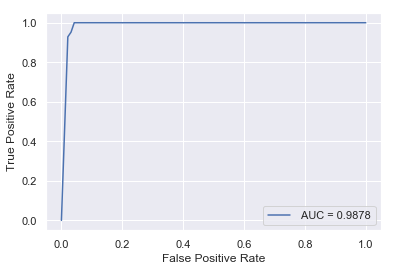

In [144]:
plt.plot(fpr,tpr, label = ' AUC = %.4f'% roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()
#Got the same thing as you - that the AUC is highest for KNN

In [149]:
auc_score = []
k = range(1,100)
for i in k:
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train,y_train)
    pred = classifier.predict(x_test)
    prob_pos_classifier = classifier.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_pos_classifier, pos_label=4)
    roc_auc = auc(fpr, tpr)
    auc_score.append(roc_auc)


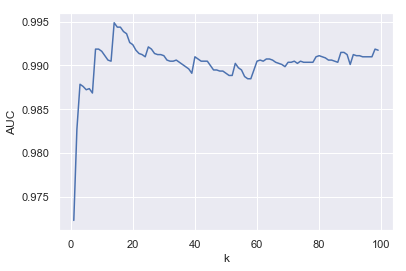

In [156]:
plt.plot(k,auc_score)
plt.xlabel('k')
plt.ylabel('AUC')
plt.show()
#Shows the AUCs for each K

In [157]:
auc_score.index(max(auc_score))

13

C:\Users\drobey\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


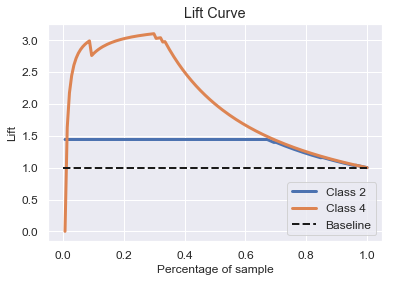

In [168]:
import scikitplot as skplt
#This is a sick package - so useful for illustrations
prob_pos = classifier.predict_proba(x_test)
skplt.metrics.plot_lift_curve(y_test, prob_pos)
plt.show()
#This is the lift curve, this is pretty sick

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
classes = ["Benign","Malignant"]
print(y_predict)
prob_pos_clf = clf.predict_proba(x_test)[:,1]
print(prob_pos_clf)
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_pos_clf, pos_label=4)
roc_auc = auc(fpr, tpr)
# Export as dot file
column_names = list(BC_df.columns.values).pop
export_graphviz(clf, out_file='tree.dot', 
                feature_names = column_names)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')
#Trying to display this studpid decision tree

[2 2 2 2 2 4 4 2 4 2 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 4 4 4 4 4 2 4 2 2 2 2
 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 4 4 2 2 4 2 2 2 2
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 2 4 2 2 2 2 2 2 4 2 4 4 4 2 4 4 2 2 4
 2 4 4 2 2 2 4 4 2 2 2 2 4 4 2 2 4 2 2 2 4 2 2 2 2 2]
[0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


TypeError: object of type 'builtin_function_or_method' has no len()

In [176]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(x_train, y_train)

C:\Users\drobey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [182]:
# Actual class predictions
rf_predictions = model.predict(x_test)
# Probabilities for each class
rf_probs = model.predict_proba(x_test)[:, 1]
# Calculate roc auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs, pos_label=4)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9927318295739348


In [183]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

,feature,importance
1,Uniformity of Cell Size,0.255307
2,Uniformity of Cell Shape,0.202165
5,Bare Nuclei,0.191066
4,Single Epithelial Cell Size,0.103690
6,Bland Chromatin,0.101106


In [188]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
estimator = model.estimators_[5]
classes = ["Benign","Malignant"]
column_names = list(BC_df.columns.values).pop
graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=column_names, class_names=classes 
   , filled = True))
display(SVG(graph.pipe(format='svg')))
#I cannot figure out how to display this tree for the life of me lol

TypeError: object of type 'builtin_function_or_method' has no len()